In [1]:
import pandas as pd
import datamol as dm
import numpy as np

from molfeat.calc import RDKitDescriptors2D, FPCalculator, MordredDescriptors
from molfeat.trans import MoleculeTransformer

In [2]:
train_data = dm.read_csv("train_admet.csv", smiles_column="Drug", index_col=0)

[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not r

,Drug_ID,Drug,Y,property,mol
0,0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1,
1,1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1,
2,2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1,
3,3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1,
4,4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1,
...,...,...,...,...,...
7934,7934,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1,3,
7935,7935,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1,3,
7936,7936,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1,3,
7937,7937,CCc1c(C)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(OC...,1,3,

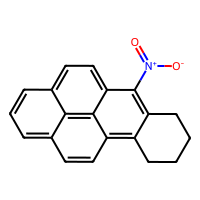
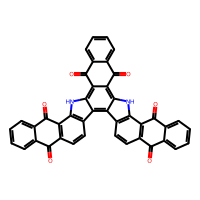
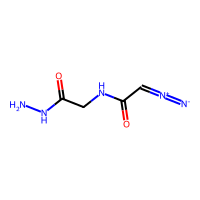
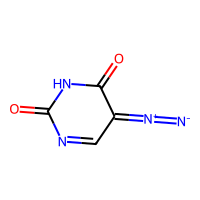
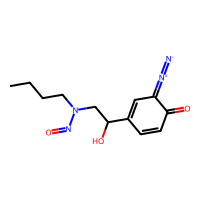
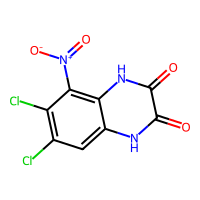
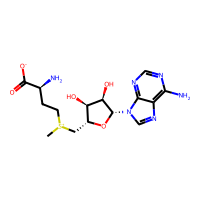
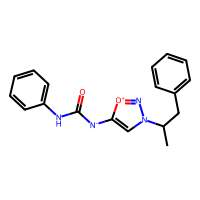
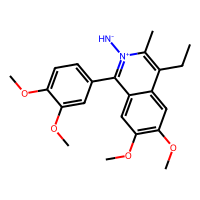
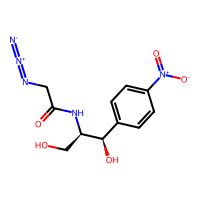

In [3]:
train_data

In [4]:
from molfeat.trans.concat import FeatConcat
from molfeat.trans.fp import FPVecTransformer

rdkit = FPVecTransformer("desc2D", n_jobs=8, dtype=np.float32, replace_nan=True)
maccs = FPVecTransformer("maccs", dtype=np.float32)
ecfp4 = FPVecTransformer("ecfp:4", dtype=np.float32)

# Wrap the calculator in a transformer instance
featurizer = FeatConcat([maccs, ecfp4, rdkit], dtype=np.float32)

with dm.without_rdkit_log():
    feats = featurizer(train_data["mol"])

/home/jupyter-nm_rostislav/.conda/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRECATION WARNING: please use MorganGenerator
[14:52:19] DEPRE

In [5]:
feats.shape

(7939, 2383)

In [6]:
feats

array([[0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 2., 0., 6.],
       ...,
       [0., 0., 0., ..., 2., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 5.]])

In [7]:
labels = train_data["Y"]
labels

0       1
1       0
2       1
3       1
4       1
       ..
7934    1
7935    1
7936    1
7937    1
7938    1
Name: Y, Length: 7939, dtype: int64

In [8]:
labels.unique()

array([1, 0])

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).fit(train_data[["property"]].to_numpy())

In [10]:
ohe.transform(train_data[["property"]].to_numpy())

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [11]:
X = np.concatenate([feats, ohe.transform(train_data[["property"]].to_numpy())], axis=-1)

In [12]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [13]:
model = HistGradientBoostingClassifier(random_state=42)

In [14]:
model.fit(X, labels)

HistGradientBoostingClassifier(random_state=42)

In [15]:
test_data = dm.read_csv("test_data.csv", smiles_column="Drug", index_col=0)

[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors
[14:54:57] WARNING: not removing hydrogen atom without neighbors


,Drug_ID,Drug,property,mol
0,0,Cc1cc(=O)oc2ccc3c(c12)C1(C)OOC1(C)O3,1,
1,1,CN(CC(O)CO)N=O,1,
2,2,O=[N+]([O-])c1ccc(OC2CO2)cc1,1,
3,3,Cn1cnc2cc([N+](=O)[O-])ccc21,1,
4,4,CC[C@H](CO)NCCN[C@H](CC)CO,1,
...,...,...,...,...
1216,1216,CCN(CC)C(=O)COc1cc2c(O)c3c(O)c(C)c4c(c13)C(=O)...,3,
1217,1217,O=C(Cc1ccc(Cl)c(Cl)c1)N1CCc2sccc2[C@H]1CN1CCCC1,3,
1218,1218,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)CC[C@H]3[C@...,3,
1219,1219,Cn1nc(-c2cccc(F)c2)n(C)c1=S,3,

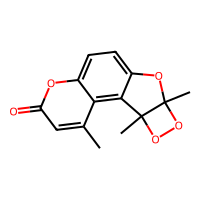
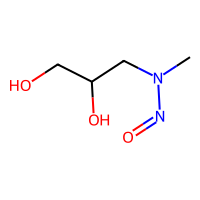
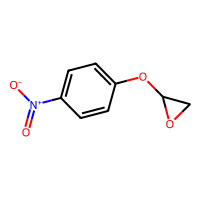
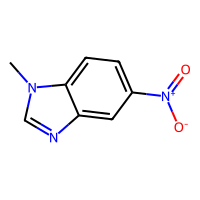
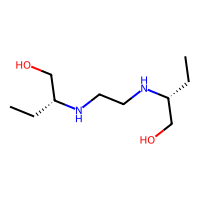
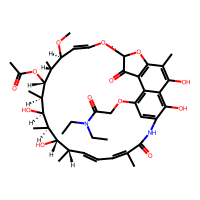
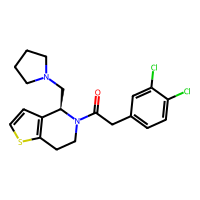
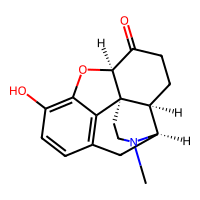
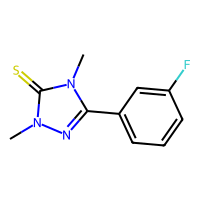
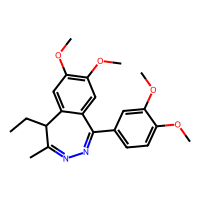

In [16]:
test_data

In [17]:
with dm.without_rdkit_log():
    feats_test = featurizer(test_data["mol"])

/home/jupyter-nm_rostislav/.conda/envs/ml/lib/python3.11/site-packages/molfeat/calc/descriptors.py:46: RuntimeWarning: All-NaN slice encountered
  min_charge, max_charge = np.nanmin(atomic_charges), np.nanmax(atomic_charges)
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:04] DEPRECATION WARNING: please use MorganGenerator
[14:55:0

In [18]:
X_test = np.concatenate([feats_test, ohe.transform(test_data[["property"]].to_numpy())], axis=-1)

In [19]:
test_preds = model.predict_proba(X_test)

In [20]:
test_preds

array([[0.16740905, 0.83259095],
       [0.04181905, 0.95818095],
       [0.03920056, 0.96079944],
       ...,
       [0.04367199, 0.95632801],
       [0.03598168, 0.96401832],
       [0.05214234, 0.94785766]])

In [21]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
sample = pd.read_csv("sample.csv")
sample

,id,Y
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
1216,1216,0
1217,1217,0
1218,1218,0
1219,1219,0


In [23]:
sample["Y"] = test_preds[:, 1]

In [24]:
sample

,id,Y
0,0,0.832591
1,1,0.958181
2,2,0.960799
3,3,0.959615
4,4,0.137953
...,...,...
1216,1216,0.033517
1217,1217,0.941944
1218,1218,0.956328
1219,1219,0.964018


In [27]:
sample.to_csv("submission.csv", index=False)